# Import libraries

In [2]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

path = "./img/download.png"


# Checkered Board

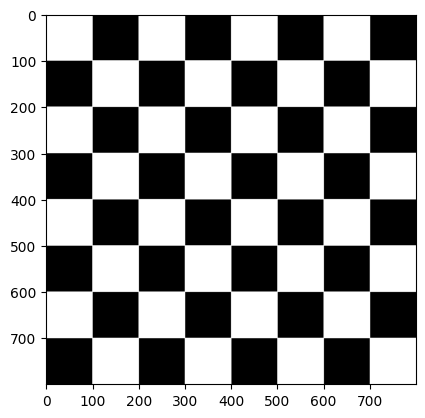

In [3]:
def create_chess_board(W, h, rows, cols):
    """
    Tạo ra một bảng cờ vua với kích thước W x h và số hàng, cột xác định.
    
    Tham số:
    W (int): Chiều rộng của hình ảnh.
    h (int): Chiều cao của hình ảnh.
    rows (int): Số hàng của bảng cờ vua.
    cols (int): Số cột của bảng cờ vua.
    
    Trả về:
    numpy.ndarray: Hình ảnh bảng cờ vua.
    """
    # Tạo một mảng 3 chiều với kích thước W x h x 3 với giá trị 0 (màu đen)
    img = np.zeros((W, h, 3), np.uint8)
    
    # Màu trắng cho các ô cờ
    color = (255, 255, 255)

    # Vẽ các ô cờ
    for i in range(rows):
        for j in range(cols):
            if (i + j) % 2 == 0:
                cv2.rectangle(img, (i * (W // rows), j * (h // cols)), 
                              ((i + 1) * (W // rows), (j + 1) * (h // cols)), color, -1)
    return img

# Hiển thị hình ảnh
plt.imshow(create_chess_board(800, 800, 8, 8))
plt.show()


# Color Corection

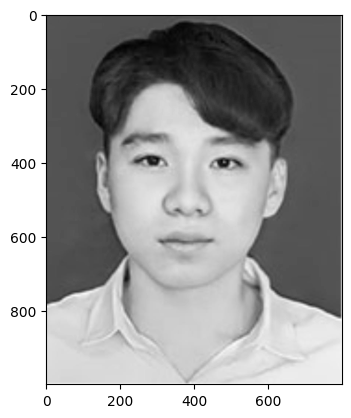

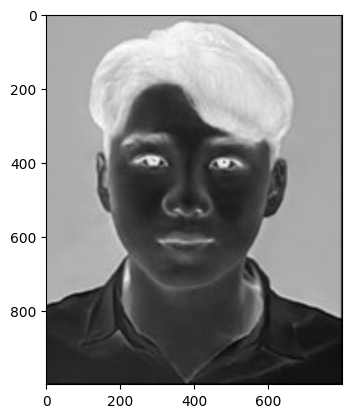

In [4]:
import cv2
import matplotlib.pyplot as plt

def grayscale_image(path):
    """Đọc hình ảnh grayscale từ đường dẫn và đảo ngược màu sắc."""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img

def color_orection(img):
    """Đảo ngược màu sắc của hình ảnh."""
    return 255 - img
def display_image(img, cmap="gray"):
    plt.imshow(img, cmap=cmap)
    plt.show()

display_image(grayscale_image(path))
display_image(color_orection(grayscale_image(path)))


# Rotate image

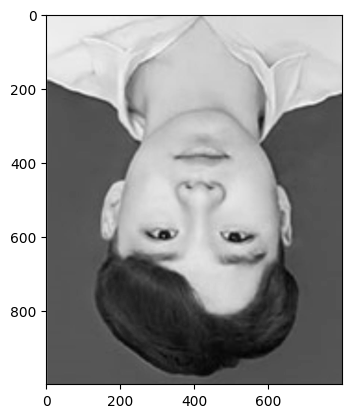

In [5]:
def rotate_image(image):
    """
    Xoay ngược hình ảnh 180 độ bằng vòng lặp for.
    
    Tham số:
    image (numpy.ndarray): Hình ảnh dưới dạng mảng numpy.
    
    Trả về:
    numpy.ndarray: Hình ảnh sau khi xoay ngược 180 độ.
    """

    # Lấy kích thước của hình ảnh
    h, w = image.shape[:2]

    # Tạo một mảng rỗng để lưu trữ hình ảnh đã xoay
    rotated = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            rotated[h - 1 - i, w - 1 - j] = image[i, j]

    return rotated

img = rotate_image(grayscale_image(path= path))
plt.imshow(img,cmap='gray')
plt.show()


# Color Separation

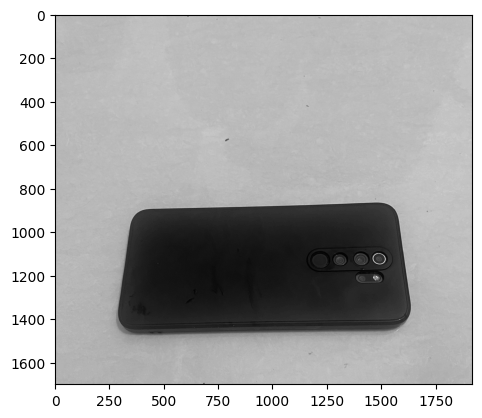

In [6]:
pathv2 = "./img/imagev2.jpg"
imgv2 = grayscale_image(path= pathv2)
plt.imshow(imgv2,cmap='gray')


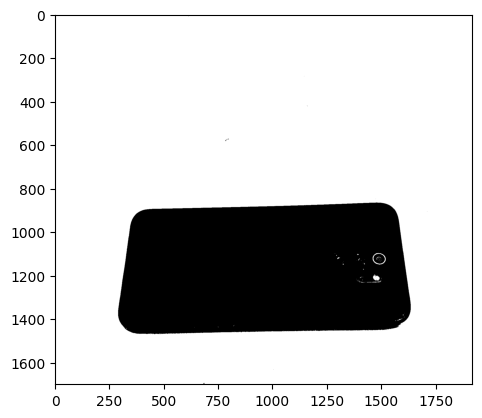

In [7]:
def separate_object(img, threshold_value=80):
    """
    Tách đối tượng từ hình ảnh đen trắng sử dụng phương pháp ngưỡng (threshold) với vòng lặp for.
    """    
    # Lấy kích thước của hình ảnh
    h, w = img.shape
    
    # Tạo một mảng rỗng để lưu trữ hình ảnh sau khi áp dụng ngưỡng
    thresholded_image = np.zeros((h, w), dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            if img[i, j] > threshold_value:
                thresholded_image[i, j] = 255
            else:
                thresholded_image[i, j] = 0
    
    return img, thresholded_image

plt.imshow(separate_object(imgv2)[1], cmap='gray')
plt.show()


# Corner Line

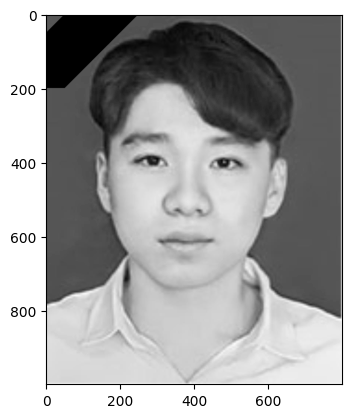

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def draw_black_line(img, thickness=5):
    """
    Vẽ một đường thẳng màu đen cắt chéo góc trên bên trái của hình ảnh grayscale.
    
    Tham số:
    - img (numpy.ndarray): Hình ảnh grayscale đầu vào dưới dạng mảng numpy.
    - thickness (int): Độ dày của đường thẳng, mặc định là 5 pixel.

    """
    h, w = img.shape
    
    for i in range(min(200, h)):
        for j in range(min(200, w)):
            x = 50 - i + j
            if 0 <= x < w:
                img[i, x] = 0
    return img

img = grayscale_image(path=path)
img_with_line = draw_black_line(img)

plt.imshow(img_with_line, cmap='gray')
plt.show()


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


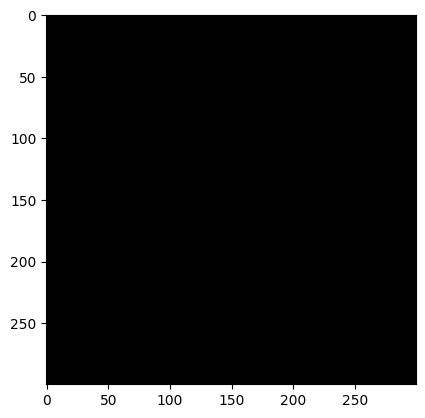

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Kích thước của ảnh
height, width = 300, 300

# Tạo một ảnh trắng (giá trị pixel là 255)
image = np.ones((height, width), dtype=np.uint8) * 255
print( image)
# Độ dày của đường chéo
line_thickness = 10

# Vẽ đường chéo từ (0, 200) đến góc phải dưới cùng
# for i in range(100):
#     for t in range(-line_thickness // 2, line_thickness // 2):
#         if 200 + i + t < height and i + t < width:
#             image[200 + i + t, i] = 0

# Hiển thị ảnh
plt.imshow(image, cmap='gray')
plt.show()


# Gradient

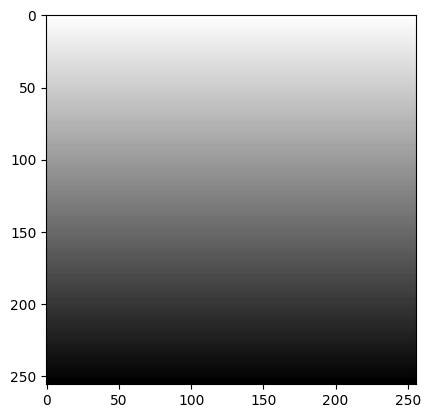

In [10]:
def create_gradient_image(w, h):
    """
    Tạo một hình ảnh có gradient từ trắng đến đen sử dụng vòng lặp for.
    
    Tham số:
    - w (int): Chiều rộng của hình ảnh.
    - h (int): Chiều cao của hình ảnh.
    
    Trả về:
    - gradient_image (numpy.ndarray): Hình ảnh với gradient từ trắng đến đen.
    """
    # Tạo một mảng rỗng để lưu trữ hình ảnh gradient
    gradient_image = np.zeros((h, w), dtype=np.uint8)
    
    # Sử dụng vòng lặp for để tạo gradient
    for i in range(h):
        # Tính giá trị màu cho mỗi hàng (từ 255 đến 0)
        color_value = int(255 * (1 - i / (h - 1)))
        
        # Gán giá trị màu cho toàn bộ hàng
        gradient_image[i, :] = color_value
    
    return gradient_image

w, h = 256, 256
gradient_img = create_gradient_image(w, h)
plt.imshow(gradient_img, cmap='gray', vmin=0, vmax=255)
plt.show()


# Letter B

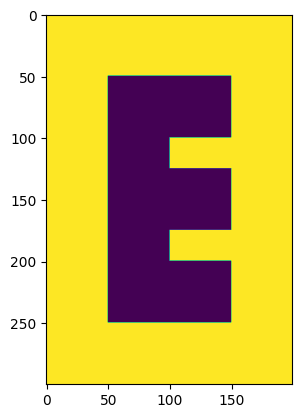

In [12]:
import numpy as np
import cv2

def draw_letter_b(height=300, width=200, thickness=40):
    """
    Tạo và hiển thị chữ "B" trên một canvas màu đen.

    Args:
    - height (int): Chiều cao của canvas.
    - width (int): Chiều rộng của canvas.
    - thickness (int): Độ dày của chữ "B".

    Returns:
    - image (numpy.ndarray): Hình ảnh chứa chữ "B".
    """
    # Tạo canvas màu đen
    image = np.zeros((height, width), dtype=np.uint8)

    # Vẽ đường dọc của chữ "B"
    cv2.rectangle(image, (50, 50), (50 + thickness, 250), 255, -1)

    # Vẽ đường ngang phía trên của chữ "B"
    cv2.rectangle(image, (50 + thickness, 50), (150, 50 + thickness), 255, -1)

    # Vẽ đường ngang phía dưới của chữ "B"
    cv2.rectangle(image, (50 + thickness, 250 - thickness), (150, 250), 255, -1)

    # Vẽ đường ngang giữa của chữ "B"
    cv2.rectangle(image, (50 + thickness, 150 - thickness // 2), (150, 150 + thickness // 2), 255, -1)

    # Hiển thị hình ảnh
    cv2.imshow("Letter B", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return image

# Gọi hàm để vẽ chữ B
draw_letter_b()
